<a href="https://colab.research.google.com/github/rianachatterjee04/GenAssist/blob/main/Road_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 913.5/913.5 kB 31.5 MB/s eta 0:00:00


importing YOLO V8 model

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 919, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.11/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are frozenset({'benchmark', 'train', 'track', 'predict', 'val', 'export'}).

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of frozenset({'detect', 'segment', 'pose', 'obb', 'classify'})
                MODE (required) is one of frozenset({'benchmark', 'train', 'track', 'predict', 'val', 'export'})
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' tha

Processing road data videos

In [ ]:
import os
import cv2

# Set up directories
output_dir = "frames"
os.makedirs(output_dir, exist_ok=True)

# Specify the video file name (upload videos directly into Colab or provide the path)
video_path = "IMG_5844.MOV"  # Replace with the actual uploaded video filename

# Open the video file
vidcap = cv2.VideoCapture(video_path)

if not vidcap.isOpened():
    print(f"Error: Could not open video file {video_path}")
    exit()

# Frame extraction settings
frame_rate = 30  # Adjust to extract every nth frame
success, image = vidcap.read()
count = 0

# Loop through frames
while success:
    if int(vidcap.get(cv2.CAP_PROP_POS_FRAMES)) % frame_rate == 0:
        frame_name = os.path.join(output_dir, f"frame{count}.jpg")
        cv2.imwrite(frame_name, image)  # Save frame as JPEG
        print(f"Saved: {frame_name}")
        count += 1
    success, image = vidcap.read()

vidcap.release()  # Release the video file
print(f"Extracted {count} frames to {output_dir}")


Saved: frames/frame0.jpg
Saved: frames/frame1.jpg
Saved: frames/frame2.jpg
Saved: frames/frame3.jpg
Saved: frames/frame4.jpg
Saved: frames/frame5.jpg
Saved: frames/frame6.jpg
Saved: frames/frame7.jpg
Saved: frames/frame8.jpg
Saved: frames/frame9.jpg
Saved: frames/frame10.jpg
Saved: frames/frame11.jpg
Saved: frames/frame12.jpg
Saved: frames/frame13.jpg
Saved: frames/frame14.jpg
Saved: frames/frame15.jpg
Saved: frames/frame16.jpg
Saved: frames/frame17.jpg
Saved: frames/frame18.jpg
Saved: frames/frame19.jpg
Saved: frames/frame20.jpg
Saved: frames/frame21.jpg
Saved: frames/frame22.jpg
Saved: frames/frame23.jpg
Saved: frames/frame24.jpg
Saved: frames/frame25.jpg
Saved: frames/frame26.jpg
Saved: frames/frame27.jpg
Saved: frames/frame28.jpg
Saved: frames/frame29.jpg
Saved: frames/frame30.jpg
Saved: frames/frame31.jpg
Saved: frames/frame32.jpg
Saved: frames/frame33.jpg
Saved: frames/frame34.jpg
Saved: frames/frame35.jpg
Saved: frames/frame36.jpg
Saved: frames/frame37.jpg
Saved: frames/frame38.

Download data

In [ ]:
import shutil

shutil.make_archive("frames_archive", 'zip', output_dir)
from google.colab import files
files.download("frames_archive.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Extracting the ZIP file

In [ ]:
import zipfile
import os

# Path to the uploaded ZIP file
zip_path = "ROAD Data.zip"  # Replace with the correct filename if different

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("dataset")  # Extract to a folder named "dataset"

print("Files extracted successfully!")



Files extracted successfully!


Dataset structure

In [ ]:
# List all directories and subdirectories
for root, dirs, files in os.walk("dataset"):
    print(f"Root: {root}")
    print(f"Directories: {dirs}")
    print(f"Files: {files}")
    print("-" * 50)



Root: dataset
Directories: ['ROAD Data', '__MACOSX']
Files: []
--------------------------------------------------
Root: dataset/ROAD Data
Directories: ['test', 'train', 'valid']
Files: ['data.yaml', 'README.roboflow.txt', 'README.dataset.txt', '.DS_Store']
--------------------------------------------------
Root: dataset/ROAD Data/test
Directories: ['labels', 'images']
Files: []
--------------------------------------------------
Root: dataset/ROAD Data/test/labels
Directories: []
Files: ['frame22_jpg.rf.8f2040bc67e2e6275cf9598ccb541e98.txt', 'frame50_jpg.rf.89586f51bc286362c5386db7cf9eebbf.txt', 'frame48_jpg.rf.8aed56e01bae2450256c2003c2ecccc1.txt', 'frame30_jpg.rf.a11308c0670b69549d48b832af3a14cc.txt', 'frame55_jpg.rf.d40cd6e600ea9d7408e0f0b3d6710783.txt', 'frame67_jpg.rf.158db73c16bad5409cb3c5ff561096d6.txt', 'frame26_jpg.rf.9c17a92c755dd8ee2118e087e572dac6.txt']
--------------------------------------------------
Root: dataset/ROAD Data/test/images
Directories: []
Files: ['frame48_jpg

Relocate dir

In [ ]:
import shutil
import os

# Define the source folder
source_folder = "dataset/ROAD Data"

# List subfolders to move
for folder in ["train", "test", "valid"]:
    shutil.move(os.path.join(source_folder, folder), "dataset")

# Remove unnecessary folders
shutil.rmtree(source_folder)
shutil.rmtree("dataset/__MACOSX", ignore_errors=True)

# Verify the structure
print("Cleaned dataset structure:")
print(os.listdir("dataset"))


Cleaned dataset structure:
['test', 'train', 'valid']


Remove unwanted files

In [ ]:
# Remove .DS_Store and other hidden files
for root, dirs, files in os.walk("dataset"):
    for file in files:
        if file.startswith("."):
            os.remove(os.path.join(root, file))

# Verify that hidden files are removed
print("After cleanup:")
for root, dirs, files in os.walk("dataset"):
    print(f"Root: {root}, Files: {files}")


After cleanup:
Root: dataset, Files: []
Root: dataset/test, Files: []
Root: dataset/test/labels, Files: ['frame22_jpg.rf.8f2040bc67e2e6275cf9598ccb541e98.txt', 'frame50_jpg.rf.89586f51bc286362c5386db7cf9eebbf.txt', 'frame48_jpg.rf.8aed56e01bae2450256c2003c2ecccc1.txt', 'frame30_jpg.rf.a11308c0670b69549d48b832af3a14cc.txt', 'frame55_jpg.rf.d40cd6e600ea9d7408e0f0b3d6710783.txt', 'frame67_jpg.rf.158db73c16bad5409cb3c5ff561096d6.txt', 'frame26_jpg.rf.9c17a92c755dd8ee2118e087e572dac6.txt']
Root: dataset/test/images, Files: ['frame48_jpg.rf.8aed56e01bae2450256c2003c2ecccc1.jpg', 'frame67_jpg.rf.158db73c16bad5409cb3c5ff561096d6.jpg', 'frame22_jpg.rf.8f2040bc67e2e6275cf9598ccb541e98.jpg', 'frame30_jpg.rf.a11308c0670b69549d48b832af3a14cc.jpg', 'frame26_jpg.rf.9c17a92c755dd8ee2118e087e572dac6.jpg', 'frame55_jpg.rf.d40cd6e600ea9d7408e0f0b3d6710783.jpg', 'frame50_jpg.rf.89586f51bc286362c5386db7cf9eebbf.jpg']
Root: dataset/train, Files: []
Root: dataset/train/labels, Files: ['frame14_jpg.rf.98722df

Verify structure

In [ ]:
print(os.listdir("dataset"))
print("Train:", os.listdir("dataset/train"))
print("Test:", os.listdir("dataset/test"))
print("Validation:", os.listdir("dataset/valid"))

# Check the contents of the train folder
print("Train Images:", os.listdir("dataset/train/images")[:5])  # Show first 5 image files
print("Train Labels:", os.listdir("dataset/train/labels")[:5])  # Show first 5 label files

# Similarly, check for test and validation
print("Test Images:", os.listdir("dataset/test/images")[:5])
print("Test Labels:", os.listdir("dataset/test/labels")[:5])

print("Validation Images:", os.listdir("dataset/valid/images")[:5])
print("Validation Labels:", os.listdir("dataset/valid/labels")[:5])


import os

# Check the current directory
print("Current Directory:", os.getcwd())

# Check if dataset/valid/images exists
print("Valid Images Path Exists:", os.path.exists("dataset/valid/images"))

# List contents of dataset
print("Dataset Contents:", os.listdir("dataset"))



['test', 'train', 'valid']
Train: ['labels', 'images']
Test: ['labels', 'images']
Validation: ['labels', 'images']
Train Images: ['frame38_jpg.rf.642f73727f7f476846c2cbd3af62405c.jpg', 'frame37_jpg.rf.beed234f03b41fcd224bb841ead91ce5.jpg', 'frame33_jpg.rf.eac5ba21c8cdda58c511729c3ff8a6f8.jpg', 'frame17_jpg.rf.d87fe2be621e630d067b11bb7ee0b8d3.jpg', 'frame15_jpg.rf.4c88519c1f3ca4ad28d11e8344f6aaa1.jpg']
Train Labels: ['frame14_jpg.rf.98722df3a439f657eca3f67245840cee.txt', 'frame52_jpg.rf.3fb4523b4c029b44cffa4ee9c5a54d57.txt', 'frame29_jpg.rf.b690a5f668979984196cb7275bed7557.txt', 'frame2_jpg.rf.682f8063e16b7138ded1725ff492a9e0.txt', 'frame54_jpg.rf.4e4f3e1cb44f7ba739bc9a1752f89d08.txt']
Test Images: ['frame48_jpg.rf.8aed56e01bae2450256c2003c2ecccc1.jpg', 'frame67_jpg.rf.158db73c16bad5409cb3c5ff561096d6.jpg', 'frame22_jpg.rf.8f2040bc67e2e6275cf9598ccb541e98.jpg', 'frame30_jpg.rf.a11308c0670b69549d48b832af3a14cc.jpg', 'frame26_jpg.rf.9c17a92c755dd8ee2118e087e572dac6.jpg']
Test Labels: ['fr

Data.yaml

In [ ]:
data_yaml = """
train: /content/dataset/train/images
val: /content/dataset/valid/images

# Number of classes
nc: 18

# Class names
names: ["ar", "bike", "building", "car", "null", "person", "ree", "road", "road sign", "side walk", "sign",
        "sky", "stop light", "stoplight", "street light", "tree", "trees", "tress"]
"""

# Overwrite the data.yaml file
with open("data.yaml", "w") as f:
    f.write(data_yaml)

print("data.yaml updated with nc=18!")



data.yaml updated with nc=18!


Train YOLOv8

In [ ]:
from ultralytics import YOLO

# Load a YOLOv8 model
model = YOLO("yolov8n.pt")  # Use other versions like yolov8s.pt for larger models

# Train the model
model.train(
    data="data.yaml",  # Path to the updated YAML file
    epochs=50,         # Number of epochs
    imgsz=640          # Image size
)


Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=N

100%|██████████| 755k/755k [00:00<00:00, 31.3MB/s]


Overriding model.yaml nc=80 with nc=18

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/dataset/train/labels... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<00:00, 218.25it/s]

train: New cache created: /content/dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.1 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/dataset/valid/labels... 14 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14/14 [00:00<00:00, 485.31it/s]

val: New cache created: /content/dataset/valid/labels.cache


Plotting labels to runs/detect/train7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000455, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train7
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      2.293       4.21      2.017         22        640: 100%|██████████| 4/4 [00:51<00:00, 12.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.75s/it]

                   all         14        125          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G       2.18      4.203      1.939         28        640: 100%|██████████| 4/4 [00:46<00:00, 11.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.89s/it]

                   all         14        125          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      2.106      4.195      1.857         33        640: 100%|██████████| 4/4 [00:44<00:00, 11.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.07s/it]

                   all         14        125          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.968      4.028      1.795         25        640: 100%|██████████| 4/4 [00:45<00:00, 11.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.89s/it]

                   all         14        125          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.996      4.022      1.778         34        640: 100%|██████████| 4/4 [00:43<00:00, 10.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.63s/it]

                   all         14        125          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.919      3.832      1.713         27        640: 100%|██████████| 4/4 [00:47<00:00, 11.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.89s/it]

                   all         14        125     0.0833      0.026     0.0547     0.0334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.907      3.834      1.708         27        640: 100%|██████████| 4/4 [00:48<00:00, 12.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.86s/it]

                   all         14        125      0.139     0.0567     0.0993      0.055



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.844        3.7      1.626         27        640: 100%|██████████| 4/4 [00:44<00:00, 11.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.03s/it]

                   all         14        125      0.119      0.111      0.108     0.0579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.825      3.529      1.652         23        640: 100%|██████████| 4/4 [00:43<00:00, 10.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.89s/it]

                   all         14        125     0.0805      0.187      0.125     0.0559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.896      3.316      1.697         23        640: 100%|██████████| 4/4 [00:45<00:00, 11.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.19s/it]

                   all         14        125      0.122      0.289       0.18      0.079



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.908       3.24      1.617         47        640: 100%|██████████| 4/4 [00:44<00:00, 11.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.87s/it]

                   all         14        125     0.0881       0.36      0.202     0.0816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.858      3.205      1.658         28        640: 100%|██████████| 4/4 [00:45<00:00, 11.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.40s/it]

                   all         14        125     0.0571      0.393      0.214     0.0884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.876      3.063      1.654         18        640: 100%|██████████| 4/4 [00:47<00:00, 12.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.88s/it]

                   all         14        125      0.859      0.118      0.241     0.0977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.893      2.949      1.649         28        640: 100%|██████████| 4/4 [00:44<00:00, 11.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.29s/it]

                   all         14        125      0.885      0.132      0.267      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.863      2.828      1.714         17        640: 100%|██████████| 4/4 [00:45<00:00, 11.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.89s/it]

                   all         14        125       0.89      0.148       0.28      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.883      2.779      1.663         23        640: 100%|██████████| 4/4 [00:43<00:00, 10.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.72s/it]

                   all         14        125      0.887      0.145      0.285      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.807      2.614      1.596         25        640: 100%|██████████| 4/4 [00:45<00:00, 11.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.43s/it]

                   all         14        125      0.859      0.127       0.29      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.846      2.668      1.635         17        640: 100%|██████████| 4/4 [00:50<00:00, 12.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.92s/it]

                   all         14        125      0.825      0.201      0.308      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      1.837      2.412      1.648         13        640: 100%|██████████| 4/4 [00:43<00:00, 10.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  5.00s/it]

                   all         14        125      0.818      0.264      0.313      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.794      2.426      1.553         47        640: 100%|██████████| 4/4 [00:43<00:00, 10.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.91s/it]

                   all         14        125      0.826      0.263       0.33      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.777      2.347      1.564         29        640: 100%|██████████| 4/4 [00:44<00:00, 11.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.58s/it]

                   all         14        125      0.807      0.298      0.341       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.764      2.315      1.567         32        640: 100%|██████████| 4/4 [00:46<00:00, 11.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.93s/it]

                   all         14        125      0.829      0.299       0.36      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.828      2.207      1.641         23        640: 100%|██████████| 4/4 [00:43<00:00, 11.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.25s/it]

                   all         14        125      0.828      0.293      0.345      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G       1.83      2.187      1.575         33        640: 100%|██████████| 4/4 [00:44<00:00, 11.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.86s/it]

                   all         14        125      0.804      0.298      0.344       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.769      2.146      1.564         36        640: 100%|██████████| 4/4 [00:43<00:00, 10.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.01s/it]

                   all         14        125      0.799      0.315      0.345      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      1.717      2.288      1.593         15        640: 100%|██████████| 4/4 [00:45<00:00, 11.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.88s/it]

                   all         14        125      0.807      0.311      0.347      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      1.702      2.083      1.574         23        640: 100%|██████████| 4/4 [00:46<00:00, 11.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.02s/it]

                   all         14        125      0.785      0.312      0.343      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G      1.664      2.086      1.536         40        640: 100%|██████████| 4/4 [00:44<00:00, 11.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.88s/it]

                   all         14        125      0.815      0.293      0.353      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      1.608      2.046      1.509         20        640: 100%|██████████| 4/4 [00:44<00:00, 11.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.96s/it]

                   all         14        125       0.83      0.329      0.361      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G       1.73      1.962      1.527         45        640: 100%|██████████| 4/4 [00:44<00:00, 11.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.92s/it]

                   all         14        125      0.842      0.324      0.356       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G      1.707      2.114      1.528         57        640: 100%|██████████| 4/4 [00:44<00:00, 11.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.42s/it]

                   all         14        125      0.859       0.32      0.355       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G      1.674       1.95      1.543         28        640: 100%|██████████| 4/4 [00:45<00:00, 11.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.86s/it]

                   all         14        125      0.825      0.311      0.348      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G      1.752      2.053      1.649         20        640: 100%|██████████| 4/4 [00:43<00:00, 10.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.36s/it]

                   all         14        125      0.486      0.401      0.337      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      1.686      1.916       1.53         60        640: 100%|██████████| 4/4 [00:44<00:00, 11.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.89s/it]

                   all         14        125      0.525       0.42      0.333      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G      1.669      1.924      1.495         32        640: 100%|██████████| 4/4 [00:43<00:00, 10.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.92s/it]

                   all         14        125      0.671      0.299      0.327      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G      1.686      1.886      1.517         47        640: 100%|██████████| 4/4 [00:43<00:00, 10.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.88s/it]

                   all         14        125      0.628      0.329       0.32      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G       1.65      1.806      1.565         18        640: 100%|██████████| 4/4 [00:44<00:00, 11.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.31s/it]

                   all         14        125      0.642      0.332      0.316      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G      1.641      1.834      1.561         20        640: 100%|██████████| 4/4 [00:42<00:00, 10.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.47s/it]

                   all         14        125      0.515      0.404      0.322      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G      1.626      1.846      1.468         47        640: 100%|██████████| 4/4 [00:43<00:00, 10.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.85s/it]

                   all         14        125      0.629       0.38      0.336      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G       1.61      1.912      1.568         16        640: 100%|██████████| 4/4 [00:43<00:00, 10.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.18s/it]

                   all         14        125      0.667      0.355      0.338      0.152


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G      1.742      1.979      1.635         24        640: 100%|██████████| 4/4 [00:43<00:00, 10.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.85s/it]

                   all         14        125      0.774      0.354      0.343      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G      1.696      1.838      1.611         22        640: 100%|██████████| 4/4 [00:43<00:00, 10.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.20s/it]

                   all         14        125      0.791      0.329      0.339      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G      1.696      1.792      1.551         16        640: 100%|██████████| 4/4 [00:41<00:00, 10.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.93s/it]

                   all         14        125       0.78       0.34      0.339      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G      1.596      1.848      1.557         16        640: 100%|██████████| 4/4 [00:42<00:00, 10.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.84s/it]

                   all         14        125      0.672      0.373      0.334      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G      1.656      1.711      1.574         24        640: 100%|██████████| 4/4 [00:42<00:00, 10.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.53s/it]

                   all         14        125      0.665       0.36      0.326      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G      1.697      1.905      1.521         22        640: 100%|██████████| 4/4 [00:41<00:00, 10.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.70s/it]

                   all         14        125      0.787      0.327      0.325      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G      1.645      1.765      1.587         16        640: 100%|██████████| 4/4 [00:43<00:00, 10.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.84s/it]

                   all         14        125      0.808      0.343       0.33      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G      1.535      1.719      1.468         16        640: 100%|██████████| 4/4 [00:42<00:00, 10.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.89s/it]

                   all         14        125      0.798      0.346      0.336      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G      1.666      1.752      1.522         26        640: 100%|██████████| 4/4 [00:41<00:00, 10.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.07s/it]

                   all         14        125      0.791      0.351      0.336      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G      1.723       1.78      1.602         15        640: 100%|██████████| 4/4 [00:47<00:00, 11.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.87s/it]

                   all         14        125      0.693      0.357      0.339      0.157



50 epochs completed in 0.694 hours.
Optimizer stripped from runs/detect/train7/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train7/weights/best.pt, 6.3MB

Validating runs/detect/train7/weights/best.pt...
Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,009,158 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.21s/it]


                   all         14        125      0.831      0.329      0.361      0.164
              building         11         17       0.46      0.647      0.358      0.135
                   car          8         18      0.992      0.667      0.783      0.305
                  null          1          1          1          0          0          0
                person          9         16      0.885      0.483       0.71      0.363
                  road         11         12      0.424      0.917      0.822      0.492
             road sign          8          9      0.543      0.667      0.547      0.255
             side walk          2          2          1          0          0          0
                  sign          4          4          1          0      0.512      0.196
                   sky          4          5          1          0     0.0098    0.00196
            stop light          2          2          1          0          0          0
             stopligh

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 2,  3,  4,  5,  7,  8,  9, 10, 11, 12, 13, 14])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f3044fdd550>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,  

Evaluating the model

In [ ]:
metrics = model.val()
print(metrics)


Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,009,158 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/dataset/valid/labels.cache... 14 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14/14 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.17s/it]


                   all         14        125      0.831      0.329      0.361      0.164
              building         11         17       0.46      0.647      0.358      0.135
                   car          8         18      0.992      0.667      0.783      0.305
                  null          1          1          1          0          0          0
                person          9         16      0.885      0.483       0.71      0.363
                  road         11         12      0.424      0.917      0.822      0.492
             road sign          8          9      0.543      0.667      0.547      0.255
             side walk          2          2          1          0          0          0
                  sign          4          4          1          0      0.512      0.196
                   sky          4          5          1          0     0.0098    0.00196
            stop light          2          2          1          0          0          0
             stopligh

Download the trained model

In [ ]:
# Save the model weights
model.export(format="torchscript")  # Export in the desired format (e.g., ONNX, CoreML)

from google.colab import files

# Correct path to the best weights
files.download("runs/detect/train7/weights/best.pt")


Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)

PyTorch: starting from 'runs/detect/train7/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 22, 8400) (6.0 MB)

TorchScript: starting export with torch 2.5.1+cu121...
TorchScript: export success ✅ 3.6s, saved as 'runs/detect/train7/weights/best.torchscript' (11.9 MB)

Export complete (4.4s)
Results saved to /content/runs/detect/train7/weights
Predict:         yolo predict task=detect model=runs/detect/train7/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train7/weights/best.torchscript imgsz=640 data=data.yaml  
Visualize:       https://netron.app


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Testing Data (specific index/image)

Test image path: /content/dataset/test/images/frame67_jpg.rf.158db73c16bad5409cb3c5ff561096d6.jpg

image 1/1 /content/dataset/test/images/frame67_jpg.rf.158db73c16bad5409cb3c5ff561096d6.jpg: 640x640 2 buildings, 1 road, 3 street lights, 231.0ms
Speed: 4.3ms preprocess, 231.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


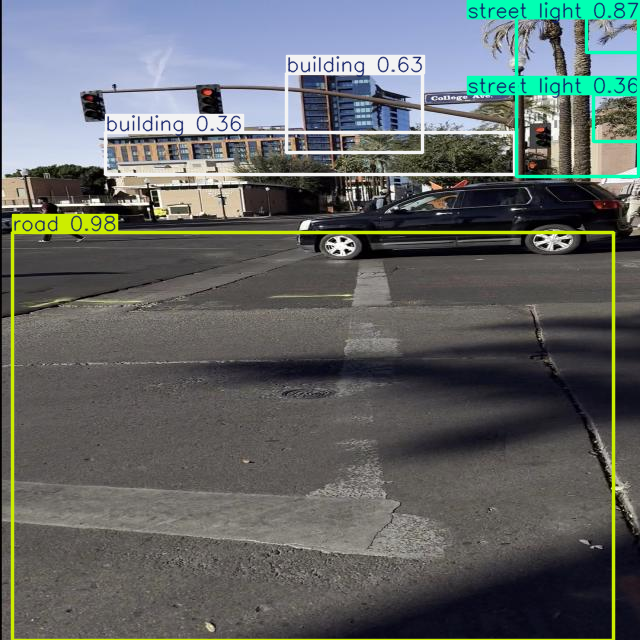

In [ ]:
import os

# Define the path to the test images folder
test_images_path = "/content/dataset/test/images"

# List all images in the test images folder
test_images = os.listdir(test_images_path)

# Select a specific image for inference (e.g., the first image)
test_image_path = os.path.join(test_images_path, test_images[1])  # First image in the folder
print("Test image path:", test_image_path)

# Run inference
results = model(test_image_path)

# Display results for the first (and only) result in the list
results[0].show()


Testing entire testing set

Running inference on: /content/dataset/test/images/frame48_jpg.rf.8aed56e01bae2450256c2003c2ecccc1.jpg

image 1/1 /content/dataset/test/images/frame48_jpg.rf.8aed56e01bae2450256c2003c2ecccc1.jpg: 640x640 1 car, 3 roads, 5 street lights, 235.8ms
Speed: 3.4ms preprocess, 235.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


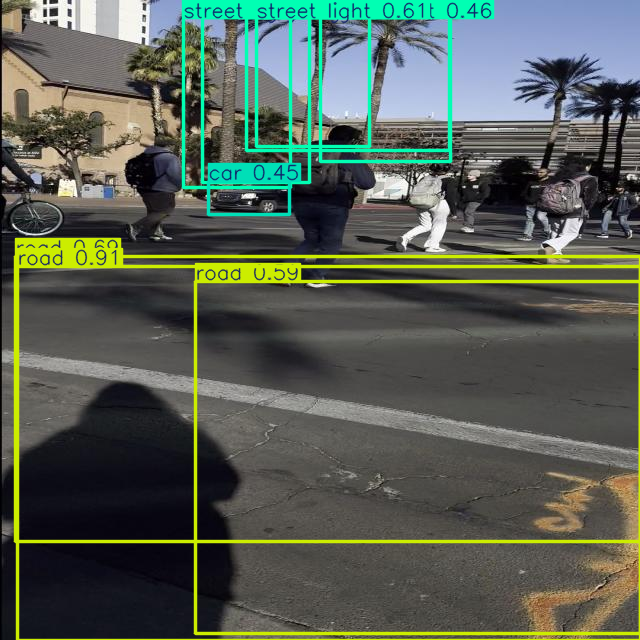

Running inference on: /content/dataset/test/images/frame67_jpg.rf.158db73c16bad5409cb3c5ff561096d6.jpg

image 1/1 /content/dataset/test/images/frame67_jpg.rf.158db73c16bad5409cb3c5ff561096d6.jpg: 640x640 2 buildings, 1 road, 3 street lights, 276.4ms
Speed: 4.4ms preprocess, 276.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


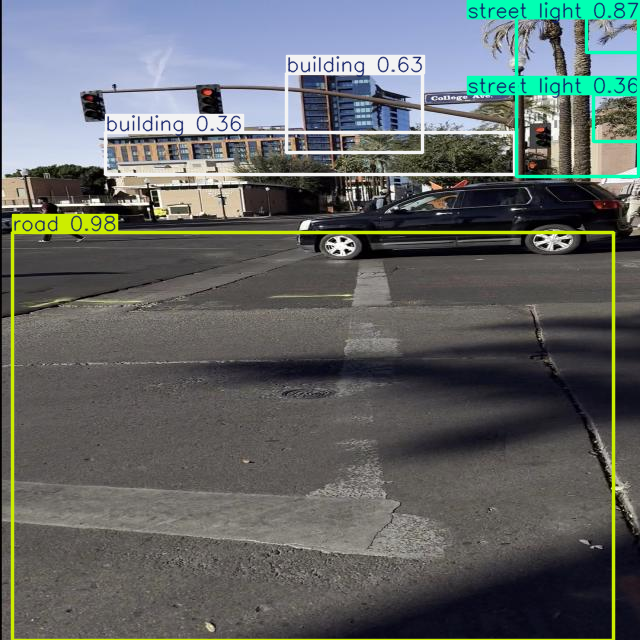

Running inference on: /content/dataset/test/images/frame22_jpg.rf.8f2040bc67e2e6275cf9598ccb541e98.jpg

image 1/1 /content/dataset/test/images/frame22_jpg.rf.8f2040bc67e2e6275cf9598ccb541e98.jpg: 640x640 1 building, 1 car, 1 person, 1 road, 1 road sign, 2 street lights, 330.2ms
Speed: 4.3ms preprocess, 330.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


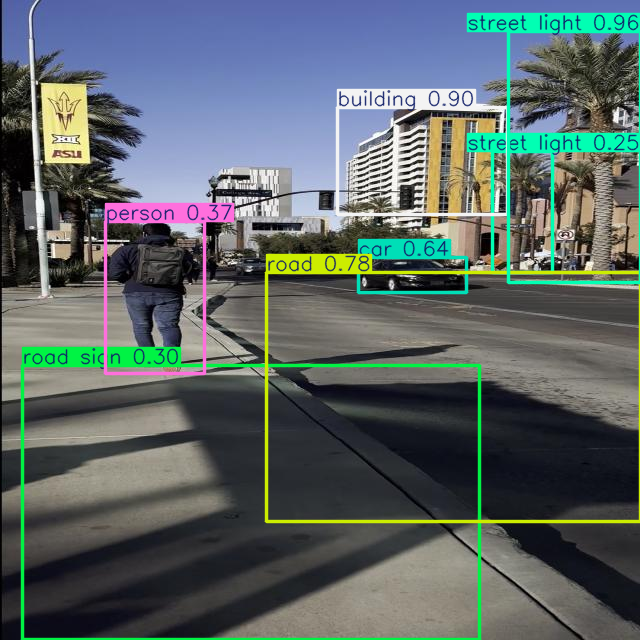

Running inference on: /content/dataset/test/images/frame30_jpg.rf.a11308c0670b69549d48b832af3a14cc.jpg

image 1/1 /content/dataset/test/images/frame30_jpg.rf.a11308c0670b69549d48b832af3a14cc.jpg: 640x640 2 buildings, 1 car, 1 person, 1 road, 2 road signs, 5 street lights, 294.8ms
Speed: 4.3ms preprocess, 294.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


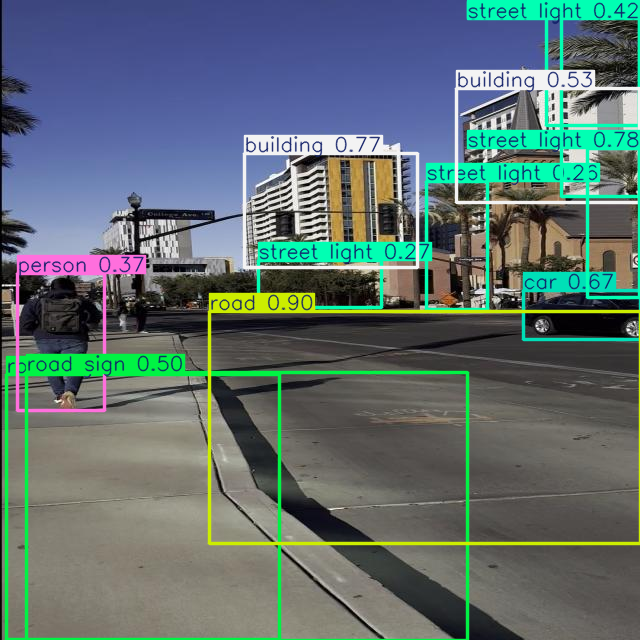

Running inference on: /content/dataset/test/images/frame26_jpg.rf.9c17a92c755dd8ee2118e087e572dac6.jpg

image 1/1 /content/dataset/test/images/frame26_jpg.rf.9c17a92c755dd8ee2118e087e572dac6.jpg: 640x640 2 buildings, 1 road, 2 road signs, 2 street lights, 316.2ms
Speed: 8.4ms preprocess, 316.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


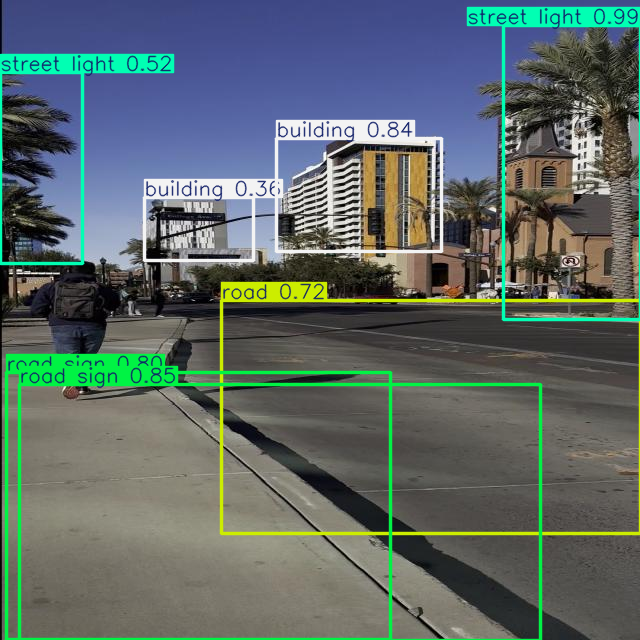

Running inference on: /content/dataset/test/images/frame55_jpg.rf.d40cd6e600ea9d7408e0f0b3d6710783.jpg

image 1/1 /content/dataset/test/images/frame55_jpg.rf.d40cd6e600ea9d7408e0f0b3d6710783.jpg: 640x640 2 buildings, 3 roads, 1 street light, 290.0ms
Speed: 6.5ms preprocess, 290.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


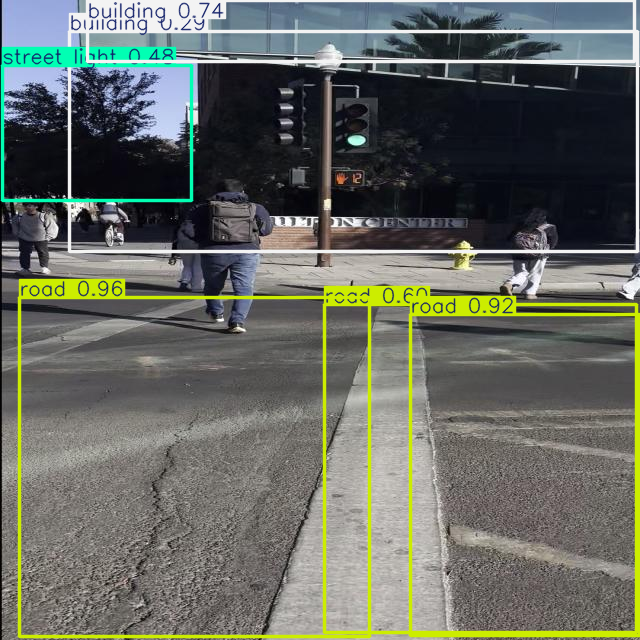

Running inference on: /content/dataset/test/images/frame50_jpg.rf.89586f51bc286362c5386db7cf9eebbf.jpg

image 1/1 /content/dataset/test/images/frame50_jpg.rf.89586f51bc286362c5386db7cf9eebbf.jpg: 640x640 1 building, 1 road, 2 street lights, 321.3ms
Speed: 4.2ms preprocess, 321.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


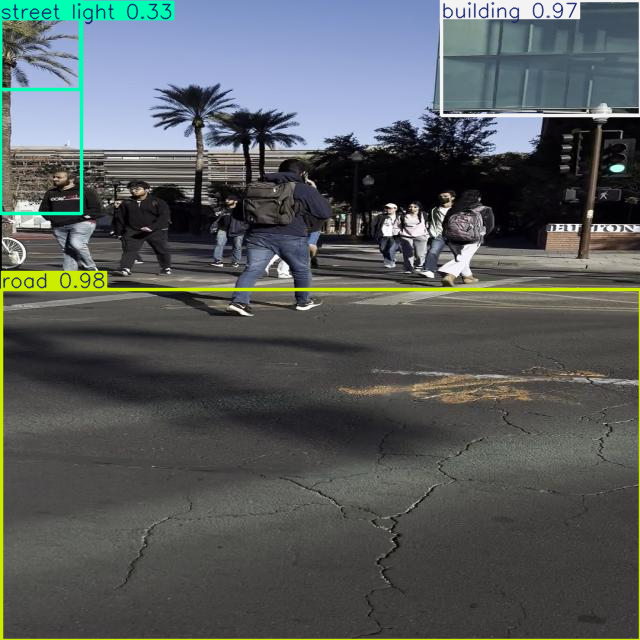

Inference completed! Results saved to: inference_results


In [ ]:
import os
import shutil

# Define the path to the test images folder
test_images_path = "/content/dataset/test/images"

# List all images in the test images folder (filtering for .jpg and .png files)
test_images = [img for img in os.listdir(test_images_path) if img.endswith(('.jpg', '.png'))]

# Directory to save inference results
results_save_dir = "inference_results"
os.makedirs(results_save_dir, exist_ok=True)

# Run inference on all images in the folder
for image_file in test_images:
    # Construct the full image path
    test_image_path = os.path.join(test_images_path, image_file)
    print(f"Running inference on: {test_image_path}")

    # Run inference
    results = model(test_image_path)

    # Process each result in the list
    for result in results:
        # Show the annotated image
        result.show()

        # Save the annotated image to the custom directory
        save_path = os.path.join(results_save_dir, f"annotated_{os.path.basename(result.path)}")
        result.plot(save_path)  # Save the annotated image

print(f"Inference completed! Results saved to: {results_save_dir}")


Model Checkpoints/ Average Runtime

In [ ]:
import time
import numpy as np
import cv2
import IPython.display as display
from ultralytics import YOLO
from google.colab.patches import cv2_imshow  # Required for image display in Colab

# Load YOLOv8 model
model = YOLO("yolov8n.pt")  # Replace with your trained model checkpoint

# Path to a video file or use a webcam (Webcam might not work in Colab)
video_path = "input_video.mp4"
cap = cv2.VideoCapture(video_path)

frame_times = []  # List to store frame processing times
total_frames = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break  # Exit loop if video ends

    start_time = time.time()  # Start time before inference

    results = model(frame)  # Run YOLOv8 inference

    end_time = time.time()  # End time after inference
    frame_time = end_time - start_time  # Time per frame
    frame_times.append(frame_time)

    total_frames += 1

    # Display inference result (Colab-friendly way)
    annotated_frame = results[0].plot()

    # Resize the image for display (Colab doesn't support live `cv2.imshow()`)
    resized_frame = cv2.resize(annotated_frame, (640, 480))

    # Display the frame in Colab
    cv2_imshow(resized_frame)
    display.clear_output(wait=True)  # Clears output to update the displayed frame

# Release resources
cap.release()

# Calculate performance statistics
avg_time_per_frame = np.mean(frame_times)  # Average time per frame (seconds)
fps = 1 / avg_time_per_frame  # Frames per second
total_time = sum(frame_times)  # Total inference time

# Print results
print(f"Total frames processed: {total_frames}")
print(f"Total inference time: {total_time:.2f} seconds")
print(f"Average time per frame: {avg_time_per_frame:.4f} seconds")
print(f"FPS (


